# Titanic - Feature Analysis

#### Feature Engineering and Exploratory data analysis

Let's explore the Titanic dataset. We will analyze all the features in the dataset and find what would correlate/contributes to Survival factor.

In [122]:
# Import libraries 

# For data analysis and wrangling
import pandas as pd

# For plots
import matplotlib.pyplot as plt
import seaborn as sns

# To have plot inline with jupyter notebook
% matplotlib inline

In [123]:
# Load training and test dataset
df_titan_train = pd.read_csv("Titanic/train.csv")
df_titan_test = pd.read_csv("Titanic/test.csv")

In [124]:
# Get a view of training dataset
df_titan_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
# Get basic information from both the datasets
print('_'*40)
print('Training Dataset')
df_titan_train.info()
print('_'*40)
print('_'*40)
print('Test Dataset')
df_titan_test.info()

________________________________________
Training Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
________________________________________
Test Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 

In [126]:
# Check out the "object" data types in train dataset
df_titan_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Gronnestad, Mr. Daniel Danielsen",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [127]:
# Now lets check out the "object" data types in test dataset
df_titan_test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Bowenur, Mr. Solomon",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


**Missing/Null values in the dataset:-**
- Train dataset : Age, Cabin and Embarked
- Train dataset : Age, Fare and Cabin
- Cabin feature has very few values present in both dataset (approx 22%) and many of these values are unique. It would be over engineering to work on missing Cabin values and won't add much value to our objective of finding Survival factors. We will work on missing values of Embarked, Fare and Age features.

**Missing value - Embarked in training dataset**

In [128]:
# Pick the records with null Embarked
df_titan_train[df_titan_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [129]:
# Feature 'Fare' could be derived using 'Sex' and 'Embarked' port. So lets find their distribution.

# Find Mean, median of Fares differ by Embarked and Sex on train dataset
df_titan_train[['Embarked', 'Sex', 'Fare']].dropna(how='any').groupby(['Embarked', 'Sex']).describe()

Fare                                                   \
                 count       mean        std     min      25%       50%   
Embarked Sex                                                              
C        female   73.0  75.169805  83.574380  7.2250  15.2458  56.92920   
         male     95.0  48.262109  82.715093  4.0125   7.2292  24.00000   
Q        female   36.0  12.634958  14.298841  6.7500   7.7500   7.76875   
         male     41.0  13.838922  14.243486  6.7500   7.7500   7.75000   
S        female  203.0  38.740929  46.047877  7.2500  12.5625  24.15000   
         male    441.0  21.711996  28.584699  0.0000   7.8958  10.50000   

                                     
                      75%       max  
Embarked Sex                         
C        female  91.07920  512.3292  
         male    52.47295  512.3292  
Q        female  12.35000   90.0000  
         male    15.50000   90.0000  
S        female  39.20000  263.0000  
         male    26.25000  263.0000

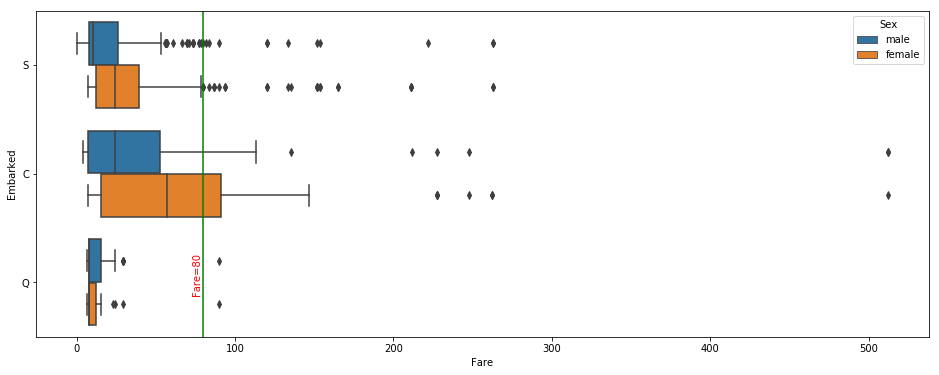

In [130]:
# Create a boxplot and show where does the 2 record with Null Embarked value and Fare = 80
fig,ax = plt.subplots(figsize=(16,6))
sns.boxplot(y=df_titan_train['Embarked'], x=df_titan_train['Fare'], hue = df_titan_train['Sex'], ax=ax, orient="h")
plt.axvline(x=80,color='green')
plt.text(73,1.8,'Fare=80',rotation=90,color='red')
plt.show()

In [131]:
# As you can see that the greenline passes through the box where Sex is female and Embarked is C 
# hence the best approximation for missing value is 'C'

# Assign Embarked value as 'C' where NULL
df_titan_train['Embarked'].fillna('C', inplace=True)

**Missing value - Fare in test dataset**

In [132]:
# Find records with Null Fares
df_titan_test[df_titan_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [133]:
# Find pattern for Fare on train/test dataset combined
pd.concat([df_titan_train[['Embarked', 'Sex', 'Fare']],df_titan_test[['Embarked', 'Sex', 'Fare']]])\
                                            .dropna(how='any').groupby(['Embarked', 'Sex']).describe()

Fare                                                  \
                 count       mean        std     min      25%      50%   
Embarked Sex                                                             
C        female  115.0  81.108913  90.289157  7.2250  17.5000  57.9792   
         male    157.0  48.810619  76.313722  4.0125   7.2292  21.6792   
Q        female   60.0  12.550837  15.270739  6.7500   7.7500   7.7500   
         male     63.0  12.273941  11.952730  6.7500   7.7500   7.7500   
S        female  291.0  39.339305  49.056295  7.0000  12.5625  23.0000   
         male    622.0  21.841878  28.274463  0.0000   7.8958  10.5000   

                                       
                        75%       max  
Embarked Sex                           
C        female  106.425000  512.3292  
         male     57.750000  512.3292  
Q        female    8.056275   90.0000  
         male     11.529150   90.0000  
S        female   39.200000  263.0000  
         male     26.000000  263.0000

In [134]:
# Missing Fare Value
df_titan_test['Fare'].fillna(39.339305, inplace=True)

**Missing value - Age in train and test dataset**

In [135]:
# Number of Null Age values in train and test
print("Number of training records with missing Age value :",df_titan_train[df_titan_train['Age'].isnull()]['Age'].size)
print("Number of test records with missing Age value :",df_titan_test[df_titan_test['Age'].isnull()]['Age'].size)

Number of training records with missing Age value : 177
Number of test records with missing Age value : 86


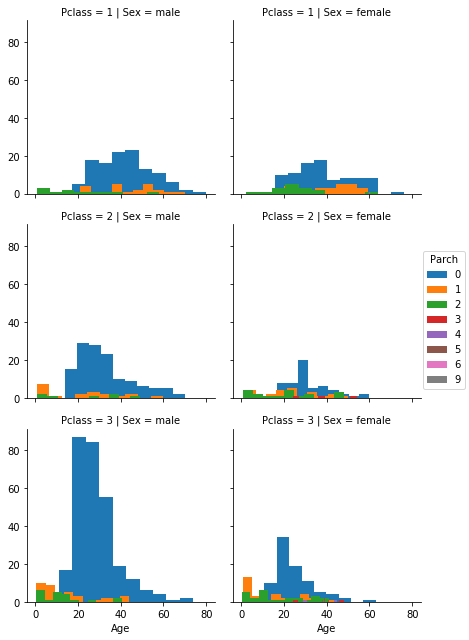

In [136]:
# Lets see how Age changes with Pclass, Sex and Parch
grid = sns.FacetGrid(pd.concat([df_titan_train,df_titan_test], sort=True), row='Pclass', col='Sex',hue='Parch')
grid.map(plt.hist,'Age')
grid.add_legend();

In [137]:
# Lets combine train and test dataset to work on missing Age value
df_list = [df_titan_train,df_titan_test]

In [138]:
# Add missing Null Age value
for df in df_list:
    for pcls in [1,2,3]:
        for sex in ['male', 'female']:
            for par in [0,1,2,3,4,5,6,9]:
                df1 = df[(df['Pclass']==pcls) & (df['Sex']==sex) & (df['Parch']==par)]
                df['Age'].fillna(df1['Age'].mean(), inplace=True)

In [139]:
# Lets view the basic info of datasets again
print('_'*40)
print('Training Dataset')
df_titan_train.info()
print('_'*40)
print('_'*40)
print('Test Dataset')
df_titan_test.info()

________________________________________
Training Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
________________________________________
Test Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 

#### Now lets analyze different features against label Survived to understand the relation and convert if necessary

**PassengerId** cannot be a factor to determine Survival as this is just an id and supposed to be unique

So let's start with **P-class**

In [140]:
# P-class and Survived (rate)
df_titan_train.groupby('Pclass', as_index=False)['Survived'].mean().sort_values('Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Next feature is **Name**

In [141]:
# Let's extract titles
for df in df_list:
    df['title'] = df['Name'].str.extract(' ([A-Za-z]+\.)', expand=True)
    

In [142]:
# Replace uncommon title
Common_title = df_titan_train.groupby('title').size().sort_values(ascending=False)[0:4].index

for df in df_list :
    for title in df.groupby('title').size().index:
        if title not in Common_title:
            df['title'].replace(title,'rare',inplace=True)
            
df_titan_train.groupby('title').size().index

Index(['Master.', 'Miss.', 'Mr.', 'Mrs.', 'rare'], dtype='object', name='title')

In [143]:
# Relation between Title and Survived
df_titan_train.groupby('title', as_index=False)['Survived'].mean().sort_values('Survived',ascending=False)

,title,Survived
3,Mrs.,0.792000
1,Miss.,0.697802
0,Master.,0.575000
4,rare,0.444444
2,Mr.,0.156673


**Sex** of passengers onboard

In [144]:
# Sex and survived
df_titan_train.groupby('Sex', as_index=False)['Survived'].mean().sort_values('Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [145]:
# Sex, title and Survived
df_titan_train.groupby(['Sex', 'title'], as_index=False)['Survived'].mean().sort_values('Survived', ascending=False)

,Sex,title,Survived
2,female,rare,1.000000
1,female,Mrs.,0.792000
0,female,Miss.,0.697802
3,male,Master.,0.575000
5,male,rare,0.250000
4,male,Mr.,0.156673


Let's combine sex and title for better prediction

In [146]:
# Concat sex and title fields
for df in df_list :
    df['Sex_title'] = df['Sex'] + ' ' + df['title']
    df.drop(['Sex','title'],axis=1,inplace=True)

In [147]:
# Sex, title and Survived (by count)
df_titan_train.groupby(['Sex_title'],as_index=False)['Survived'].count()

,Sex_title,Survived
0,female Miss.,182
1,female Mrs.,125
2,female rare,7
3,male Master.,40
4,male Mr.,517
5,male rare,20


**Age** being a numerical value, has to be converted to categorical. For this reason, it needs to be grouped and converted to the group id

In [148]:
# Create Age-group
df_titan_train['Agegrp'] = pd.cut(df_titan_train['Age'],5)
df_titan_train.groupby(['Agegrp'],as_index=False)['Survived'].mean().sort_values('Survived',ascending=False)

,Agegrp,Survived
0,"(0.34, 16.336]",0.550000
3,"(48.168, 64.084]",0.434783
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.350685
4,"(64.084, 80.0]",0.090909


In [149]:
# Age-grp vs Survived
df_titan_train.groupby(['Agegrp'],as_index=False)['Survived'].count().sort_values('Survived', ascending=False)

,Agegrp,Survived
2,"(32.252, 48.168]",365
1,"(16.336, 32.252]",346
0,"(0.34, 16.336]",100
3,"(48.168, 64.084]",69
4,"(64.084, 80.0]",11


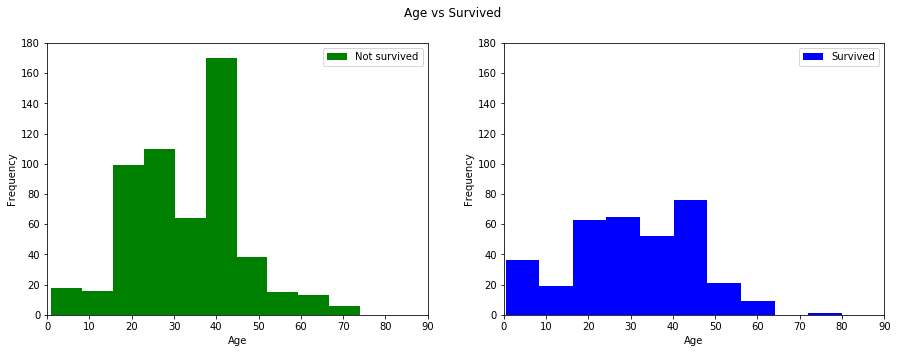

In [150]:
# Plot of Age vs Survived
fig = plt.figure(figsize=(15,5))
plt.suptitle('Age vs Survived')
plt.subplot(121)
df_titan_train[df_titan_train['Survived']==0]['Age'].plot(kind='hist',color='green')
plt.xlabel('Age')
plt.xlim(0,90)
plt.ylim(0,180)
plt.legend(['Not survived'])
plt.subplot(122)
df_titan_train[df_titan_train['Survived']==1]['Age'].plot(kind='hist',color='blue')
plt.xlabel('Age')
plt.xlim(0,90)
plt.ylim(0,180)
plt.legend(['Survived']);


Let's use a variable size Age groups for better prediction. We will use above histogram to form groups.

In [151]:
# Age group bins
agegrpbins = pd.IntervalIndex.from_tuples([(0,16),(16,30),(30,38),(38,48),(48,64),(64,80)])
for df in df_list :    
    df['Agegrp'] = pd.cut(df['Age'],agegrpbins)

In [152]:
# Age grp mapper
agegrpdict = pd.DataFrame(df_titan_train['Agegrp'].unique().sort_values().astype(str)).to_dict()[0]
agegrpmap = dict(zip(agegrpdict.values(),agegrpdict.keys()))
agegrpmap

{'(0, 16]': 0,
 '(16, 30]': 1,
 '(30, 38]': 2,
 '(38, 48]': 3,
 '(48, 64]': 4,
 '(64, 80]': 5}

In [153]:
# Map and replace
for df in df_list :
    df['Agegrp'] = df['Agegrp'].astype(str).map(agegrpmap)
    df.drop('Age',axis=1,inplace=True)

In [154]:
# Agegrp vs Survival (by rate)
df_titan_train.groupby('Agegrp',as_index=False)['Survived'].mean().sort_values('Survived', ascending=False)

,Agegrp,Survived
0,0,0.550000
2,2,0.453125
4,4,0.434783
1,1,0.359223
3,3,0.317518
5,5,0.090909


In [155]:
# Agegrp vs Survival (by count)
df_titan_train.groupby('Agegrp',as_index=False)['Survived'].count().sort_values('Survived', ascending=False)

,Agegrp,Survived
1,1,309
3,3,274
2,2,128
0,0,100
4,4,69
5,5,11


Now lets look at **SibSp** i.e. number of siblings and **Parch** i.e. Parents accompanying the passengers

In [156]:
# SibSp vs Survived (as rate)
df_titan_train.groupby('SibSp',as_index=False)['Survived'].mean().sort_values('Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [157]:
# Parch vs Survived (as rate)
df_titan_train.groupby('Parch',as_index=False)['Survived'].mean().sort_values('Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


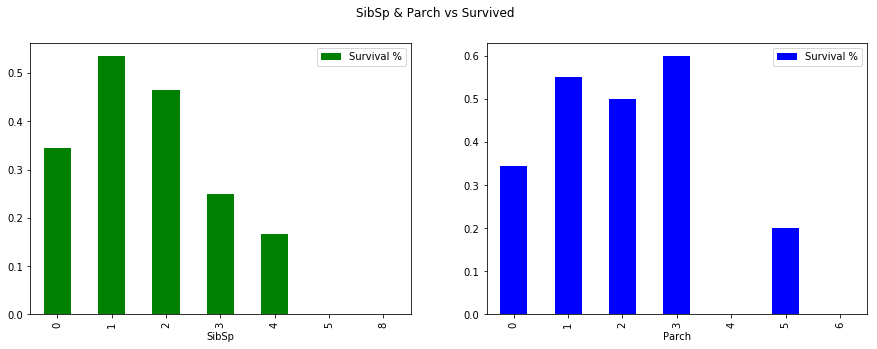

In [158]:
# Plot of SibSp & Parch vs Survived
fig = plt.figure(figsize=(15,5))
plt.suptitle('SibSp & Parch vs Survived')
plt.subplot(121)
df_titan_train.groupby(['SibSp'])['Survived'].mean()\
                                                .plot(kind='bar', color='green')
plt.xlabel('SibSp')
plt.legend(['Survival %'])
plt.subplot(122)
df_titan_train.groupby(['Parch'])['Survived'].mean()\
                                                .plot(kind='bar',color='blue')
plt.xlabel('Parch')
plt.legend(['Survival %'])
plt.show();


As you would see generally, the chances of Survival is more for mid size families, very low for large families and moderate for small families.

In [159]:
# SibSp & Parch bins
Sibbins = pd.IntervalIndex.from_tuples([(-0.01,0),(0.01,2),(2.01,4),(4.01,10)])
Parbins = pd.IntervalIndex.from_tuples([(-0.01,0),(0.01,3),(3.01,10)])
for df in df_list :    
    df['Sibsize'] = pd.cut(df['SibSp'],Sibbins)
    df['Parsize'] = pd.cut(df['Parch'],Parbins)

In [160]:
# Sibsp & Parch grp mapper
Sibdict = pd.DataFrame(df_titan_train['Sibsize'].unique().sort_values().astype(str)).to_dict()[0]
Sibmap = dict(zip(Sibdict.values(),Sibdict.keys()))
Pardict = pd.DataFrame(df_titan_train['Parsize'].unique().sort_values().astype(str)).to_dict()[0]
Parmap = dict(zip(Pardict.values(),Pardict.keys()))
print(Sibmap,'\n', Parmap)

{'(4.01, 10.0]': 3, '(-0.01, 0.0]': 0, '(0.01, 2.0]': 1, '(2.01, 4.0]': 2} 
 {'(-0.01, 0.0]': 0, '(0.01, 3.0]': 1, '(3.01, 10.0]': 2}


In [161]:
# Map and replace
for df in df_list :
    df['Sibsize'] = df['Sibsize'].astype(str).map(Sibmap)
    df['Parsize'] = df['Parsize'].astype(str).map(Parmap)
    df.drop(['SibSp', 'Parch'],axis=1,inplace=True)

In [162]:
# Sibsp Size vs Survival (by rate)
df_titan_train.groupby('Sibsize',as_index=False)['Survived'].mean().sort_values('Survived', ascending=False)

,Sibsize,Survived
1,1,0.527426
0,0,0.345395
2,2,0.205882
3,3,0.000000


In [163]:
# Parch size vs Survival (by rate)
df_titan_train.groupby('Parsize',as_index=False)['Survived'].mean().sort_values('Survived', ascending=False)

,Parsize,Survived
1,1,0.532020
0,0,0.343658
2,2,0.100000


**Fare** is another numerical variable which we would analyze and convert in the similar way as Age

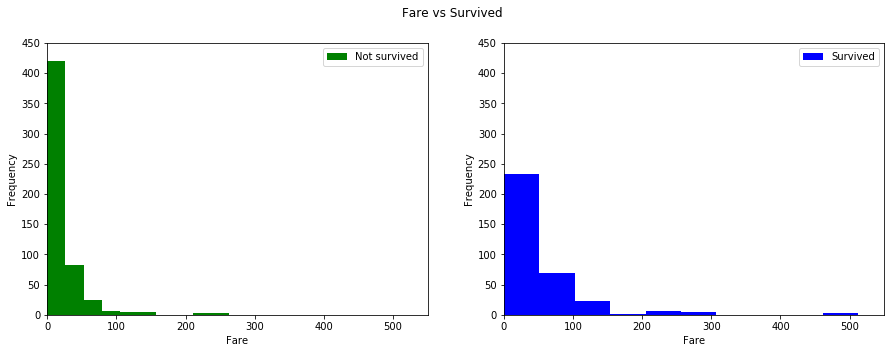

In [164]:
# Plot of Fare vs Survived
fig = plt.figure(figsize=(15,5))
plt.suptitle('Fare vs Survived')
plt.subplot(121)
df_titan_train[df_titan_train['Survived']==0]['Fare'].plot(kind='hist',color='green')
plt.xlabel('Fare')
plt.xlim(0,550)
plt.ylim(0,450)
plt.legend(['Not survived'])
plt.subplot(122)
df_titan_train[df_titan_train['Survived']==1]['Fare'].plot(kind='hist',color='blue')
plt.xlabel('Fare')
plt.xlim(0,550)
plt.ylim(0,450)
plt.legend(['Survived']);


In [165]:
# Fare group bins
faregrpbins = pd.IntervalIndex.from_tuples([(-0.01,25),(25,50),(50,100),(100,150),(150,300),(300,550)])
for df in df_list :    
    df['Faregrp'] = pd.cut(df['Fare'],faregrpbins)

In [166]:
# Fare grp mapper
faregrpdict = pd.DataFrame(df_titan_train['Faregrp'].unique().sort_values().astype(str)).to_dict()[0]
faregrpmap = dict(zip(faregrpdict.values(),faregrpdict.keys()))
faregrpmap

{'(-0.01, 25.0]': 0,
 '(100.0, 150.0]': 3,
 '(150.0, 300.0]': 4,
 '(25.0, 50.0]': 1,
 '(300.0, 550.0]': 5,
 '(50.0, 100.0]': 2}

In [167]:
# Map and replace
for df in df_list :
    df['Faregrp'] = df['Faregrp'].astype(str).map(faregrpmap)
    df.drop('Fare',axis=1,inplace=True)

In [168]:
# Faregrp vs Survival (by rate)
df_titan_train.groupby('Faregrp',as_index=False)['Survived'].mean().sort_values('Survived', ascending=False)

,Faregrp,Survived
5,5,1.000000
3,3,0.791667
2,2,0.654206
4,4,0.653846
1,1,0.419540
0,0,0.287253


In [169]:
# Faregrp vs Survival (by count)
df_titan_train.groupby('Faregrp',as_index=False)['Survived'].count().sort_values('Survived', ascending=False)

,Faregrp,Survived
0,0,557
1,1,174
2,2,107
4,4,26
3,3,24
5,5,3


As explained before **Cabin** doesn't seem to have much information to utilize however we will need **Embarked** for the model.

In [170]:
# Lets list all the features in the train/test dataset
features = df_titan_test.columns
features

Index(['PassengerId', 'Pclass', 'Name', 'Ticket', 'Cabin', 'Embarked',
       'Sex_title', 'Agegrp', 'Sibsize', 'Parsize', 'Faregrp'],
      dtype='object')

In [171]:
# Lets find all unique features count
for col in features :
    print(col,':',df_titan_train[col].nunique())

PassengerId : 891
Pclass : 3
Name : 891
Ticket : 681
Cabin : 147
Embarked : 3
Sex_title : 6
Agegrp : 6
Sibsize : 4
Parsize : 3
Faregrp : 6


In [172]:
# Lets find features that require One-Hot encoding
One_hot_feat = ['Pclass', 'Embarked', 'Sex_title', 'Agegrp', 'Sibsize', 'Parsize', 'Faregrp']
for col in One_hot_feat :
    for df in df_list :
        temp = pd.get_dummies(df[col],prefix=col)
        df[temp.columns] = temp
        df.drop(col,axis=1,inplace=True)

We will now remove all the object type features

In [173]:
# Remove all object type features as that cannot be used for any model prediction
for df in df_list :
    for col in df_titan_test.columns :
        if df[col].dtype == 'O' :
            df.drop(col,axis=1,inplace=True)

In [174]:
# Let's find information from the the datasets again
print('_'*40)
print('Training Dataset')
df_titan_train.info()
print('_'*40)
print('_'*40)
print('Test Dataset')
df_titan_test.info()

________________________________________
Training Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 33 columns):
PassengerId               891 non-null int64
Survived                  891 non-null int64
Pclass_1                  891 non-null uint8
Pclass_2                  891 non-null uint8
Pclass_3                  891 non-null uint8
Embarked_C                891 non-null uint8
Embarked_Q                891 non-null uint8
Embarked_S                891 non-null uint8
Sex_title_female Miss.    891 non-null uint8
Sex_title_female Mrs.     891 non-null uint8
Sex_title_female rare     891 non-null uint8
Sex_title_male Master.    891 non-null uint8
Sex_title_male Mr.        891 non-null uint8
Sex_title_male rare       891 non-null uint8
Agegrp_0                  891 non-null uint8
Agegrp_1                  891 non-null uint8
Agegrp_2                  891 non-null uint8
Agegrp_3                  891 non-null uint8
Agegrp_4                  8

We will now save the train and test datasets for predictions/running ML algorithms

In [175]:
# Save the train/test datasets
df_titan_train.to_csv("Titanic/df_train.csv",index=False)
df_titan_test.to_csv("Titanic/df_test.csv",index=False)